<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Scalable-Swiss-Clock" data-toc-modified-id="Scalable-Swiss-Clock-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Scalable Swiss Clock</a></span></li><li><span><a href="#Earlier-versions" data-toc-modified-id="Earlier-versions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Earlier versions</a></span></li><li><span><a href="#Trials-to-use-rectangles-for-clock-face-plate" data-toc-modified-id="Trials-to-use-rectangles-for-clock-face-plate-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trials to use rectangles for clock face plate</a></span></li></ul></div>

## Scalable Swiss Clock

The hour hand moves at the rate of 0.5 degrees per minute
The minute and second hands moves at the rate of of 6 degrees per minute


In [1]:
#Function to calculate the coordinates when a clock hand rotates
import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [2]:
import datetime
now = datetime.datetime.now()
# print('Minute', now.minute)
# print('Hour', now.hour)
# print('second', now.second)

In [3]:
#Calculate the angle of the hand from 12 'o clock'
minute_hand = now.minute * 6
#Calculate the angle of the hand on the other side of the centre point
minute_hand_opposite = (now.minute+30) * 6

In [4]:
#convert 24 hour to 12 hour
import time
t = time.strptime(str(now.hour), "%H")
timevalue_12hour = time.strftime( "%I", t )

hour_hand = (int(timevalue_12hour)*60+now.minute)*.5

hour_hand_opposite = ((int(timevalue_12hour)*60+now.minute)+360)*.5

In [5]:
seconds_hand = now.second * 6

seconds_hand_opposite = (now.second+30) * 6

In [6]:
# Define midpoint
origin = (0, 0)

#define length of hand by defining point at 12 'o clock'
pointhour = (.75, 0)
pointminute = (.95, 0)
pointsecond = (.80, 0)

pointopposite = (.2,0)
pointoppositesec = (.3,0)


facehourmarkstart = (.85,0)
faceminutemarkstart = (.92,0)
facemarkend = (1,0)


In [7]:
# Calculate points for hands
xm, ym = rotate(origin, pointminute, math.radians(minute_hand))

xmo, ymo = rotate(origin, pointopposite, math.radians(minute_hand_opposite))

xh, yh = rotate(origin, pointhour, math.radians(hour_hand))

xho, yho = rotate(origin, pointopposite, math.radians(hour_hand_opposite))

xs, ys = rotate(origin, pointsecond, math.radians(seconds_hand))

xso, yso = rotate(origin, pointoppositesec, math.radians(seconds_hand_opposite))

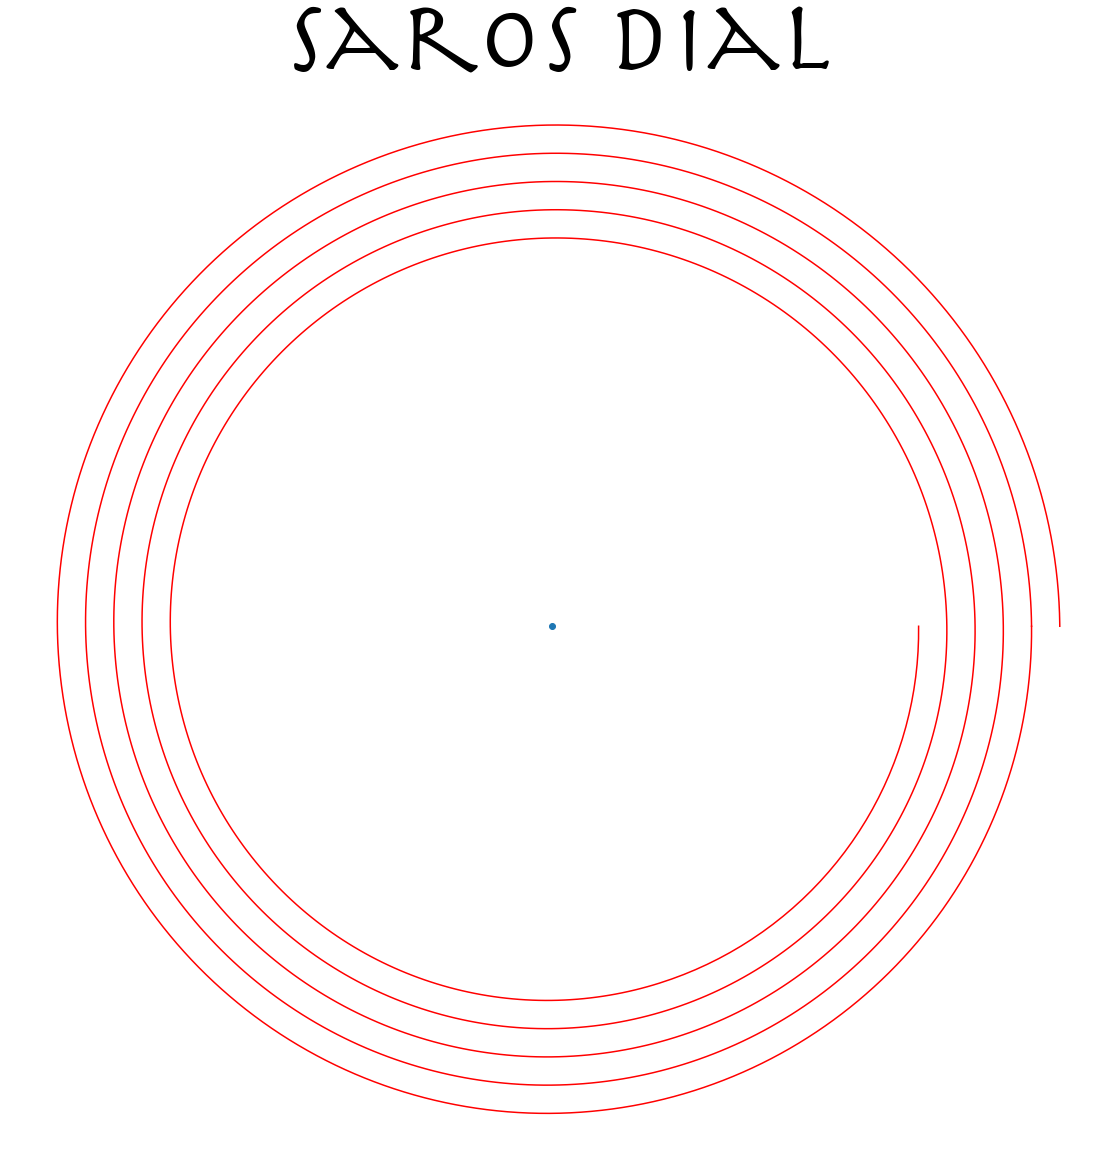

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# use latex 
plt.rc('text', usetex=False)

# define parameters
a = 2 # determines the width of the turns - set to 1 means width is 2 Pi
thetaMin, thetaMax = 26*np.pi, 34*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = 4*364+1 # Number of Saros periods (+1 for end marker)


# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

r = theta * a

x = r*np.cos(theta)
y = r*np.sin(-theta)

# Main spiral outer rim completion
thetaMinComp, thetaMaxComp = thetaMax, thetaMax+(2*np.pi)

thetaComp= np.linspace(thetaMinComp, thetaMaxComp,steps)


rComp = thetaComp * a

xComp = rComp*np.cos(thetaComp)
yComp = rComp*np.sin(-thetaComp)

# Seperator lines 
# Need to plot between the period startpoint accros the turn(out from the center (0,0))
l=np.sqrt(np.square(x)+np.square(y)+1.5) # calculate length from center, just shortening it makes it not overshoot
xnew= x*1/l*(l+2*np.pi*a) # get the x  for the line extendeaccros the turn
ynew= y*1/l*(l+2*np.pi*a) # get the y  for the line extendeaccros the turn

#start plotting
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
plt.axis('off')

for i in range(len(x),5):
    plt.plot([x[i],xnew[i]],[y[i],ynew[i]], c='r')
#     plt.scatter(x[i], y[i], c = 'g') # Plots dial points for reference



plt.plot(x, y, c='r')
plt.plot(xComp, yComp,c='r')
plt.scatter(0,0)

plt.title('Saros Dial', {'fontname': 'Herculanum',
                         'fontsize': '100',
        'fontweight' : 'bold',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})
# plt.savefig("spiral.png")
plt.show();

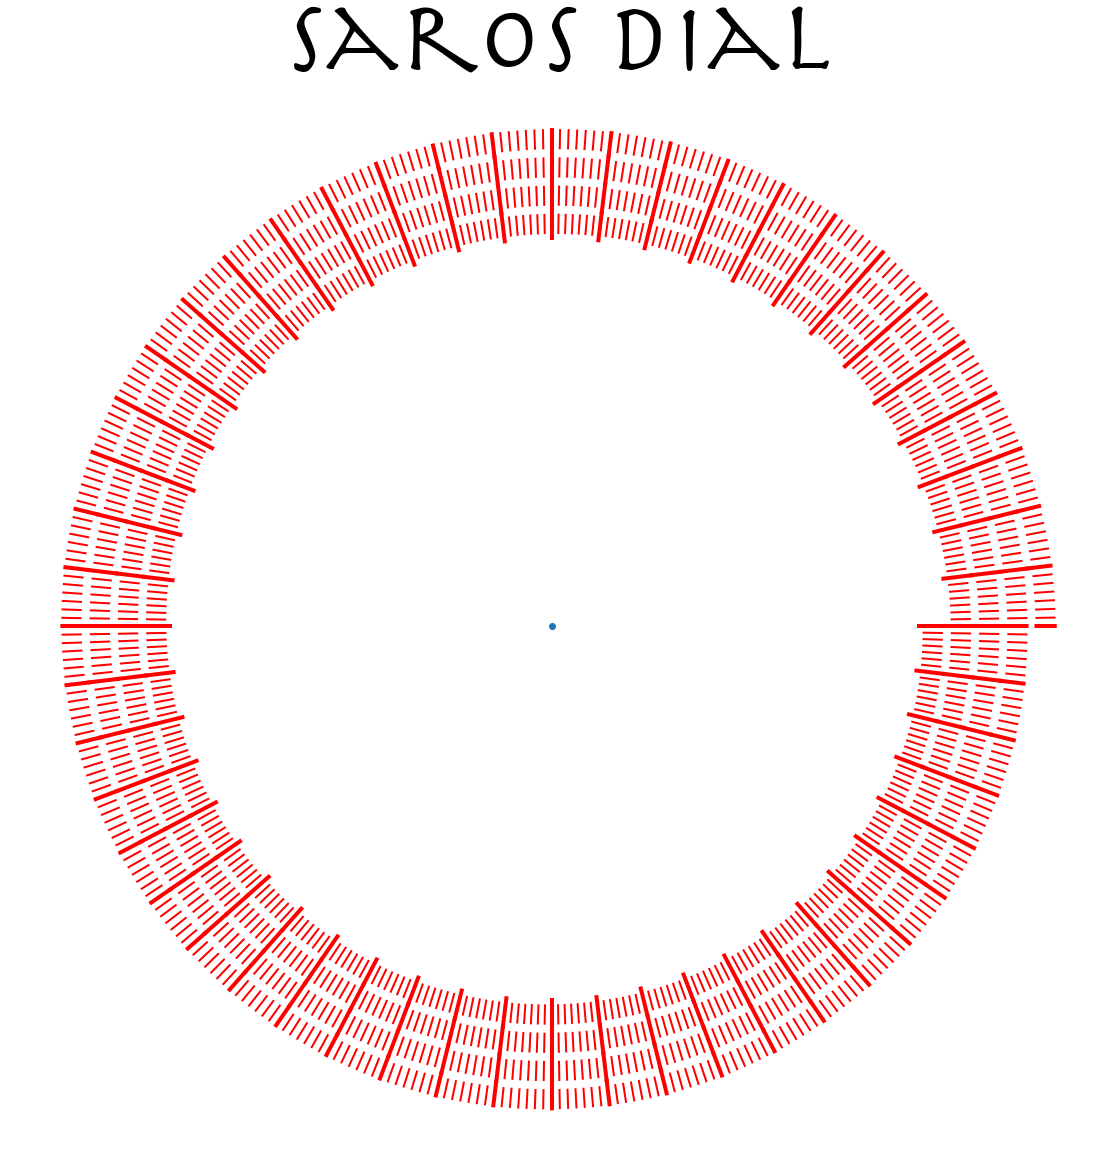

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# use latex 
plt.rc('text', usetex=False)

# define parameters
a = 2 # determines the width of the turns - set to 1 means width is 2 Pi
thetaMin, thetaMax = 26*np.pi, 34*np.pi # Dial starts at the 13th turn and finishes at the 17th turn
steps = 1457 # Number of Saros periods (+1 for end marker)


# Generate plotting values
# Main spiral

theta = np.linspace(thetaMin, thetaMax, steps)

r = theta * a

x = r*np.cos(theta)
y = r*np.sin(-theta)

# Main spiral outer rim completion
thetaMinComp, thetaMaxComp = thetaMax, thetaMax+(2*np.pi)

thetaComp= np.linspace(thetaMinComp, thetaMaxComp,steps)


rComp = thetaComp * a

xComp = rComp*np.cos(thetaComp)
yComp = rComp*np.sin(-thetaComp)

# Seperator lines 
# Need to plot between the period startpoint accros the turn(out from the center (0,0))
l=np.sqrt(np.square(x)+np.square(y)+1.5) # calculate length from center, just shortening it makes it not overshoot
xnew= x*1/l*(l+2*np.pi*a) # get the x  for the line extendeaccros the turn
ynew= y*1/l*(l+2*np.pi*a) # get the y  for the line extendeaccros the turn

#start plotting
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
plt.axis('off')

for i in range(0,len(x)):
    plt.plot([x[i],xnew[i]],[y[i],ynew[i]], c='r', lw=2)
#     plt.scatter(x[i], y[i], c = 'g') # Plots dial points for reference
plt.plot(x, y, c='w', lw=8)
plt.plot(xComp, yComp,c='w',lw=8)
for i in range(0,len(x),7):
    plt.plot([x[i],xnew[i]],[y[i],ynew[i]], c='r', lw=4)


# plt.plot(x, y, c='w', lw=6)
plt.plot(xComp, yComp,c='w',lw=6)
plt.scatter(0,0)

plt.title('Saros Dial', {'fontname': 'Herculanum',
                         'fontsize': '100',
        'fontweight' : 'bold',
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'})
# plt.savefig("spiral.png")
plt.show()

In [20]:
np.diff(x[:100])

array([ 0.01021935, -0.03821201, -0.08665244, -0.13508758, -0.18350306,
       -0.2318845 , -0.28021754, -0.32848782, -0.376681  , -0.42478275,
       -0.47277875, -0.52065473, -0.56839643, -0.61598963, -0.66342016,
       -0.71067388, -0.75773668, -0.80459454, -0.85123347, -0.89763953,
       -0.94379887, -0.98969768, -1.03532225, -1.08065892, -1.12569412,
       -1.17041438, -1.21480628, -1.25885652, -1.3025519 , -1.3458793 ,
       -1.38882572, -1.43137825, -1.47352411, -1.51525062, -1.55654524,
       -1.59739553, -1.63778918, -1.67771403, -1.71715804, -1.75610929,
       -1.79455604, -1.83248667, -1.8698897 , -1.90675383, -1.94306789,
       -1.97882089, -2.01400197, -2.04860047, -2.08260587, -2.11600786,
       -2.14879625, -2.18096108, -2.21249254, -2.24338102, -2.27361708,
       -2.30319147, -2.33209517, -2.3603193 , -2.38785521, -2.41469446,
       -2.44082878, -2.46625014, -2.49095069, -2.51492281, -2.53815908,
       -2.56065231, -2.58239551, -2.60338193, -2.62360502, -2.64

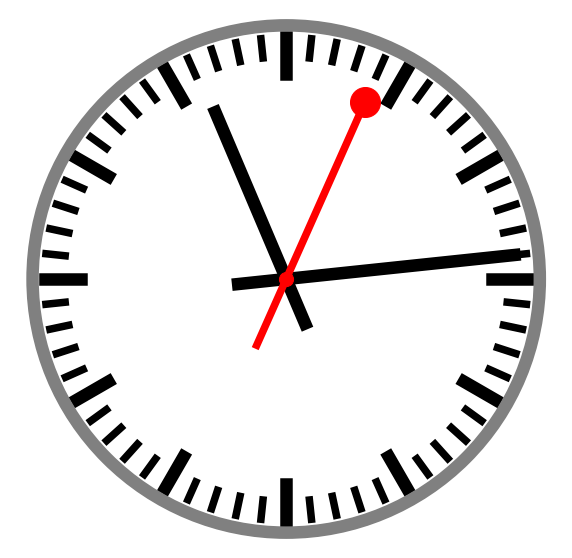

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
figsize = (10,10)
fig, ax = plt.subplots(figsize=figsize)


ax.add_patch(plt.Circle((0, 0), 1.05, fill=None, ec='grey', lw=(figsize[0]/4)*5, zorder=90))

#create clock face

for i in range(1,24,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    xfhms, yfhms = rotate(origin, facehourmarkstart, math.radians(angle))
    xfme, yfme = rotate(origin, facemarkend, math.radians(angle))
    ax.plot((yfhms, yfme),(xfhms, xfme), lw = (figsize[0]/4)*5, c='black')
 
    
for i in range(1,61):
    angle = (np.array(np.linspace(0,360,61))[i])
    xfmms, yfmms = rotate(origin, faceminutemarkstart, math.radians(angle))
    xfme, yfme = rotate(origin, facemarkend, math.radians(angle))
    ax.plot((yfmms, yfme),(xfmms, xfme), lw =(figsize[0]/4)*3, c='black')
    

#plot clock hands (opposites to go beyond the centre)
ax.plot((ym, 0),(xm, 0), lw =(figsize[0]/4)*5, c='black')
ax.plot((ymo, 0),(xmo, 0), lw =(figsize[0]/4)*5, c='black')
ax.plot((yh, 0),(xh,0), lw =(figsize[0]/4)*5, c='black')
ax.plot((yho, 0),(xho,0), lw =(figsize[0]/4)*5, c='black')
ax.plot((ys, 0),(xs,0), lw =(figsize[0]/4)*3, marker='o',c='red', markevery=-1, markersize=(figsize[0]/4)*12)
ax.plot((yso, 0),(xso,0), lw =(figsize[0]/4)*3,c='red')
ax.scatter(0,0, c= 'red', s=(figsize[0]/4)*80, zorder=100)


#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.axis('off')
plt.show();

## Earlier versions

One using a scattered marker for the clock faceplate. This does not scale when changing the figsize.

In [497]:
#create the data to plot the clock dial
df = pd.DataFrame()
hr = []
for x in range(0,24):
    hr.append(x+1)

df['hr']=hr
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))


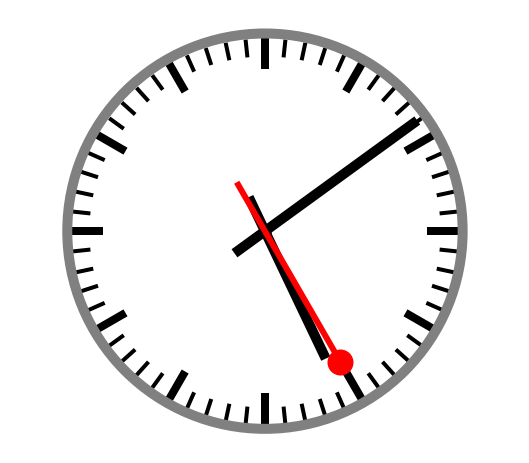

In [525]:
# https://stackoverflow.com/questions/23345565/is-it-possible-to-control-matplotlib-marker-orientation
import matplotlib.pyplot as plt
import matplotlib as mpl
figsize = (4,4)
fig, ax = plt.subplots(figsize=figsize)


ax.add_patch(plt.Circle((0, 0), 1.05, fill=None, ec='grey', lw=5, zorder=90))

for i in range(1,24,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.95), (a2*.95), marker=t, s=(figsize[0]/4)*300, c='k')
    
for i in range(1,61):
    angle = (np.array(np.linspace(0,360,61))[i])
    a1, a2  = (np.sin(i*2.*np.pi/60)),np.cos(i*(2.*np.pi/60))
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.98), (a2*.98), marker=t, s=(figsize[0]/4)*80, c='k', lw=2)

    

ax.plot((ym, 0),(xm, 0), lw =(figsize[0]/4)*5, c='black')
ax.plot((ymo, 0),(xmo, 0), lw =(figsize[0]/4)*5, c='black')
# ax.plot((0, 0),(0.8, 0), lw =5, c='black')
ax.plot((yh, 0),(xh,0), lw =(figsize[0]/4)*5, c='black')
ax.plot((yho, 0),(xho,0), lw =(figsize[0]/4)*5, c='black')
ax.scatter(0,0, c= 'red')


ax.plot((ys, 0),(xs,0), lw =(figsize[0]/4)*3, marker='o',c='red', markevery=-1, markersize=(figsize[0]/4)*12)
ax.plot((yso, 0),(xso,0), lw =(figsize[0]/4)*3,c='red')

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.axis('off')
plt.show()

## Trials to use rectangles for clock face plate

For now not able to get them in the right position

In [467]:
i=3
angle = (np.array(np.linspace(15,360,24))[i])
a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
i_=10
angle = (np.array(np.linspace(15,360,24))[i_])
a3, a4  = (df['hr_sin'][i_],df['hr_cos'][i_])

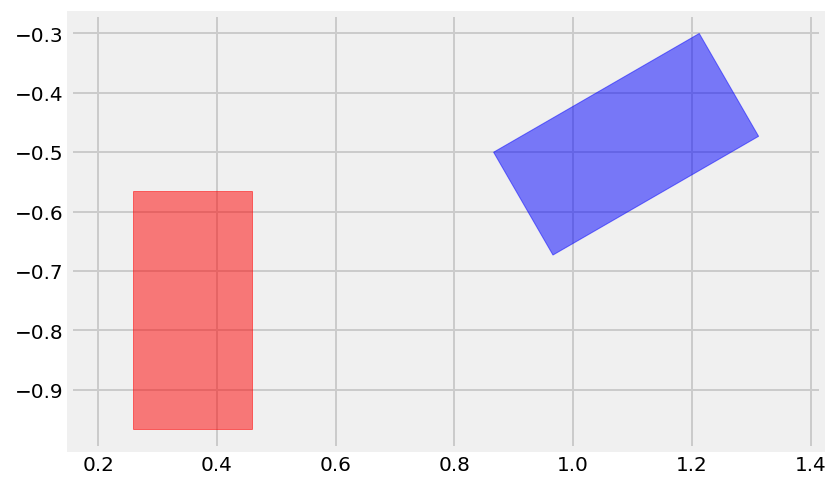

In [468]:
# https://stackoverflow.com/questions/4285103/matplotlib-rotating-a-patch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot(111)

r3 = patches.Rectangle((a1,a2), .2, .4, color="blue", alpha=0.50)
r2 = patches.Rectangle((a3,a4), .2, .4, color="red",  alpha=0.50)

t2 = mpl.transforms.Affine2D().rotate_deg(-0) + ax.transData
t3 = mpl.transforms.Affine2D().rotate_deg(-60) + ax.transData
r2.set_transform(t2)
r3.set_transform(t3)

ax.add_patch(r3)
ax.add_patch(r2)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.grid(True)
ax.axis('equal')
plt.show()

In [422]:
df['angle']= list(np.linspace(15,360,24))

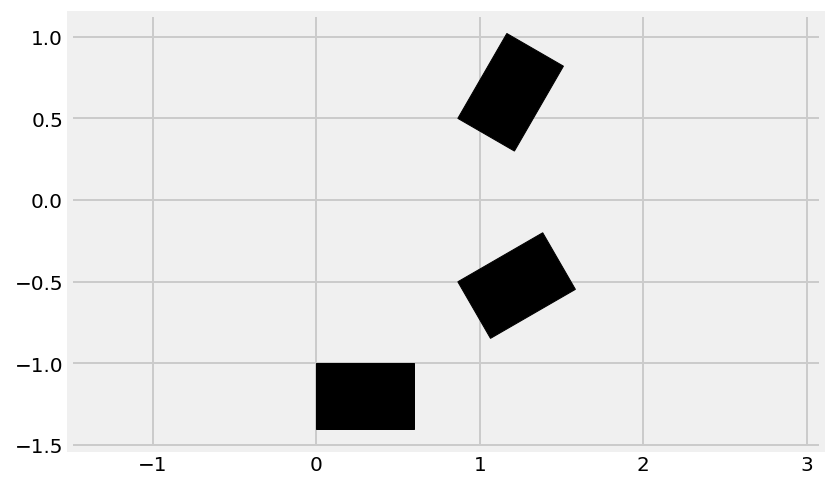

In [448]:
## import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot(111)

# r1 = patches.Rectangle((df['hr_sin'][0],df['hr_cos'][0]), .2, .4, color="blue", alpha=0.50)
# r2 = patches.Rectangle((df['hr_sin'][1],df['hr_cos'][1]), .2, .4, color="red",  alpha=0.50)

# t1 = mpl.transforms.Affine2D().rotate_deg(-df['angle'][0]) + ax.transData
# t2 = mpl.transforms.Affine2D().rotate_deg(-df['angle'][1]) + ax.transData
# r1.set_transform(t1)
# r2.set_transform(t2)

# ax.add_patch(r1)
# ax.add_patch(r2)

for i in range(1,6,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    w = .40
    l = .60    
    r1 = patches.Rectangle((df['hr_sin'][i],df['hr_cos'][i]), w, l, color='k')
    t1 = mpl.transforms.Affine2D().rotate_deg(-angle) + ax.transData
#     t1 = mpl.transforms.Affine2D().rotate_deg(-df['angle'][i]) + ax.transData
    
    r1.set_transform(t1)
    
    ax.add_patch(r1)
    


plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.grid(True)
ax.axis('equal')
plt.show()

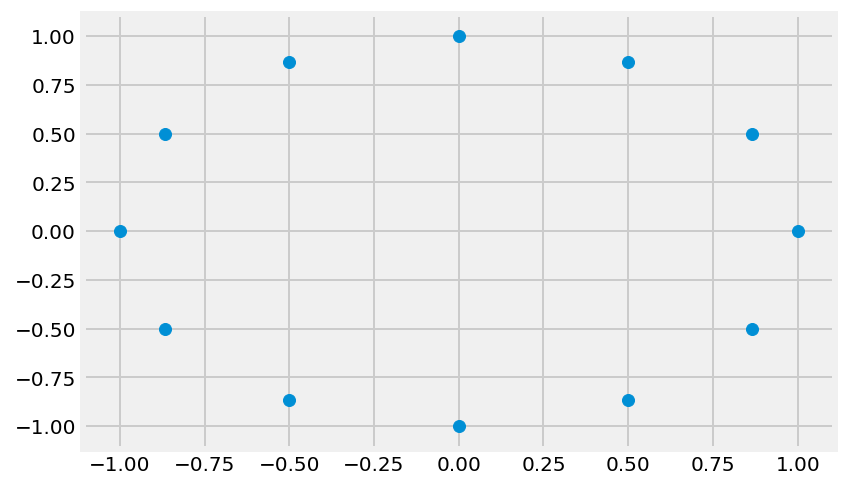

In [454]:
plt.scatter(df['hr_sin'][1::2],df['hr_cos'][1::2])

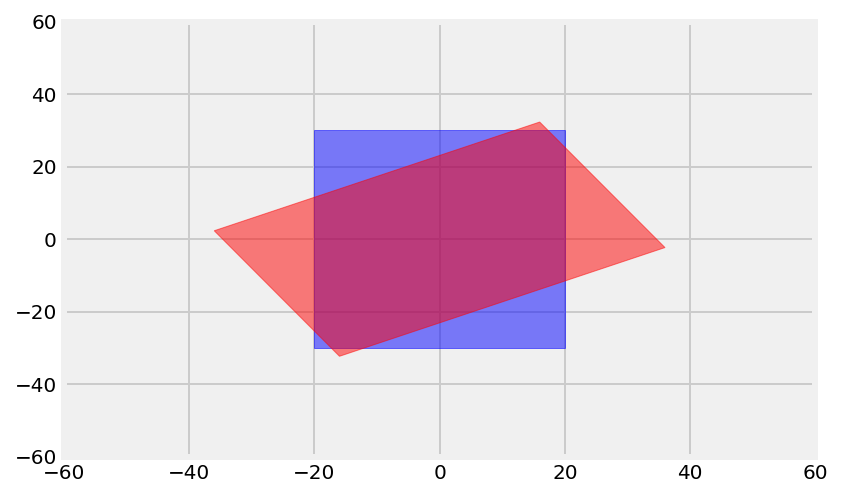

In [442]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot(111)

w = 40
l = 60
r1 = patches.Rectangle((0-(.5*w),0-(.5*l)), w, l, color="blue", alpha=0.50)

r2 = patches.Rectangle((0-(.5*w),0-(.5*l)), w, l, color="red", alpha=0.50)

t2 = mpl.transforms.Affine2D().rotate_deg(-60) + ax.transData
r2.set_transform(t2)

ax.add_patch(r1)
ax.add_patch(r2)

plt.xlim(-60, 60)
plt.ylim(-60, 60)

plt.grid(True)

plt.show()

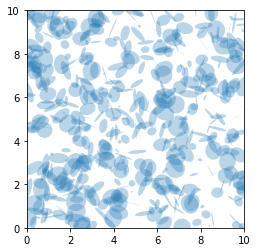

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
%matplotlib inline

NUM = 500

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(.30)
#     e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()